In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def stock_chart(ticker, start, end, interval):
    data = yf.download(tickers=ticker, start=start, end=end, interval=interval)
    return data

### Question 1

In [6]:
# Question 1
apple = stock_chart('AAPL', '2023-12-12', '2024-12-10', '1d')

[*********************100%***********************]  1 of 1 completed


In [6]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-12,193.080002,194.720001,191.720001,194.710007,193.760773,52696900
2023-12-13,195.089996,198.000000,194.850006,197.960007,196.994934,70404200
2023-12-14,198.020004,199.619995,196.160004,198.110001,197.144180,66831600
2023-12-15,197.529999,198.399994,197.000000,197.570007,196.606812,128256700
2023-12-18,196.089996,196.630005,194.389999,195.889999,194.935013,55751900


Text(0, 0.5, 'Price (USD)')

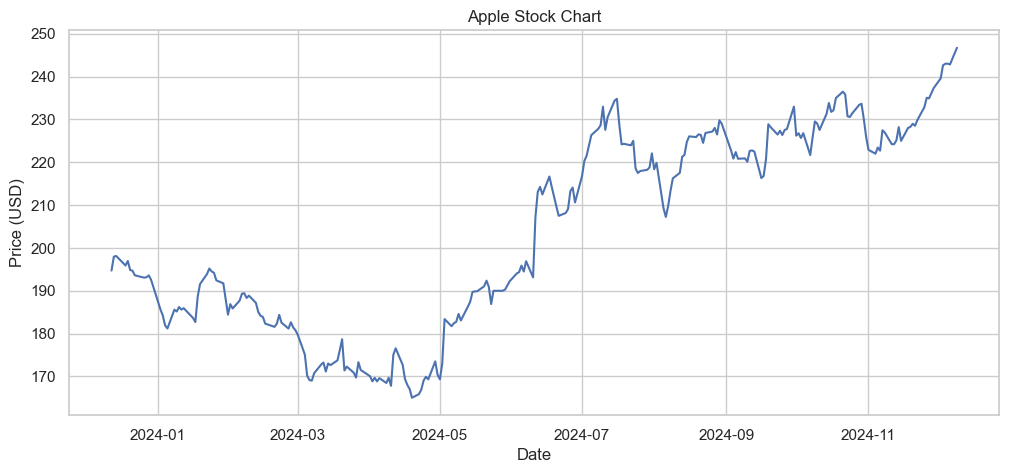

In [9]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 5))
plt.plot(apple.index, apple['Close'])
plt.title("Apple Stock Chart")
plt.xlabel("Date")                   
plt.ylabel("Price (USD)")            

 Stock chart analysis:
the stock was in bearish trend from December-2023 to May-2024 for atleast 6 months, then was extremely bullish for 2 or 2.5 months, till mid July-2024. Sence then, till today the chart has been essentially in a sideways trend. 

### Question 2


In [11]:
# question 2
df = stock_chart(['AAPL','MSFT','GOOGL'], '2024-6-10', '2024-12-10', '1d')

[*********************100%***********************]  3 of 3 completed


In [12]:
df.head()

Price                       Adj Close                               Close  \
Ticker                           AAPL       GOOGL        MSFT        AAPL   
Date                                                                        
2024-06-10 00:00:00+00:00  192.684723  174.578003  426.246979  193.119995   
2024-06-11 00:00:00+00:00  206.683105  176.184021  431.038727  207.149994   
2024-06-12 00:00:00+00:00  212.589783  177.351120  439.386963  213.070007   
2024-06-13 00:00:00+00:00  213.757141  174.727631  439.904999  214.240005   
2024-06-14 00:00:00+00:00  212.011078  176.353592  440.891235  212.490005   

Price                                                    High              \
Ticker                          GOOGL        MSFT        AAPL       GOOGL   
Date                                                                        
2024-06-10 00:00:00+00:00  175.009995  427.869995  197.300003  177.059998   
2024-06-11 00:00:00+00:00  176.619995  432.679993  207.160004  176.839996   
2024-06-12 00:00:00+00:00  177.789993  441.059998  220.199997  180.410004   
2024-06-13 00:00:00+00:00  175.160004  441.579987  216.750000  176.740005   
2024-06-14 00:00:00+00:00  176.789993  442.570007  215.169998  177.059998   

Price                                         Low                          \
Ticker                           MSFT        AAPL       GOOGL        MSFT   
Date                                                                        
2024-06-10 00:00:00+00:00  428.079987  192.149994  172.759995  423.890015   
2024-06-11 00:00:00+00:00  432.820007  193.630005  173.770004  425.250000   
2024-06-12 00:00:00+00:00  443.399994  206.899994  176.110001  433.250000   
2024-06-13 00:00:00+00:00  443.390015  211.600006  174.880005  439.369995   
2024-06-14 00:00:00+00:00  443.140015  211.300003  174.149994  436.720001   

Price                            Open                             Volume  \
Ticker                           AAPL       GOOGL        MSFT       AAPL   
Date                                                                       
2024-06-10 00:00:00+00:00  196.899994  174.970001  424.700012   97262100   
2024-06-11 00:00:00+00:00  193.649994  176.220001  425.480011  172373300   
2024-06-12 00:00:00+00:00  207.369995  178.250000  435.320007  198134300   
2024-06-13 00:00:00+00:00  214.740005  176.110001  440.850006   97862700   
2024-06-14 00:00:00+00:00  213.850006  174.220001  438.279999   70122700   

Price                                          
Ticker                        GOOGL      MSFT  
Date                                           
2024-06-10 00:00:00+00:00  23779200  14003000  
2024-06-11 00:00:00+00:00  21540600  14551100  
2024-06-12 00:00:00+00:00  27864700  22366200  
2024-06-13 00:00:00+00:00  20913300  15960600  
2024-06-14 00:00:00+00:00  18063600  13582000

In [15]:
apple_q2 = df['Close']['AAPL']
google_q2 = df['Close']['GOOGL']
msft_q2 = df['Close']['MSFT']

In [16]:
#df['daily_return']['AAPL'] = df['Close']['AAPL']- df['Close']['AAPL'].shift(1)

In [18]:
daily_return_1 = (apple_q2 - apple_q2.shift(1))/(apple_q2.shift(1))
daily_return_2 = (google_q2 - google_q2.shift(1))/google_q2.shift(1)
daily_return_3 = (msft_q2 - msft_q2.shift(1))/msft_q2.shift(1)

In [19]:
total_dr = (daily_return_1 + daily_return_2 + daily_return_3)

In [22]:
init_investment = 3333
capital = init_investment*(1 + daily_return_1).cumprod() + init_investment*(1 + daily_return_2).cumprod() + init_investment*(1 + daily_return_3).cumprod()
capital

Date
2024-06-10 00:00:00+00:00             NaN
2024-06-11 00:00:00+00:00    10309.270071
2024-06-12 00:00:00+00:00    10499.002121
2024-06-13 00:00:00+00:00    10473.158181
2024-06-14 00:00:00+00:00    10481.710014
                                 ...     
2024-12-03 00:00:00+00:00    10809.869628
2024-12-04 00:00:00+00:00    10922.240216
2024-12-05 00:00:00+00:00    10930.317387
2024-12-06 00:00:00+00:00    10973.688573
2024-12-09 00:00:00+00:00    11072.824128
Length: 127, dtype: float64

In [28]:
# another way to verify:
returns = [0,1,2]
returns[0] = (apple_q2.iloc[-1] - apple_q2.iloc[0])/apple_q2.iloc[0]
returns[1] = (google_q2.iloc[-1] - google_q2.iloc[0])/google_q2.iloc[0]
returns[2] = (msft_q2.iloc[-1] - msft_q2.iloc[0])/msft_q2.iloc[0]
returns = np.array(returns)
final_cap = 3333+ returns*3333
final_portfolio = 0
for val in final_cap:
    final_portfolio += val
final_portfolio

11072.824128355023

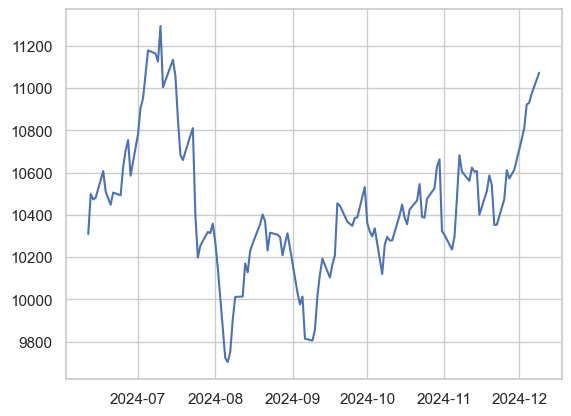

In [30]:
plt.plot(df.index, capital)

### Question 3

In [300]:
# Question 3
init_investment=100000
def analyse_portfolio(tickers, start, end, weights):
    df = yf.download(tickers, start = start, end= end, interval='1d')
    for stock in tickers:
        df[f'daily_return_{stock}'] = df['Close'][stock].pct_change()
    df['portfolio_return'] = 0
    for i in range(len(tickers)):
        df['portfolio_return'] += weights[i]*df[f'daily_return_{tickers[i]}']
    df['portfolio_val'] = 0
    for i in range(len(weights)):
        df['portfolio_val'] += weights[i]*(init_investment*(1+df[f'daily_return_{tickers[i]}']).cumprod())
    return df

In [302]:
tickers =['ZOMATO.NS', 'UJJIVANSFB.NS', 'ICICIBANK.NS','TATAMOTORS.NS','SUZLON.NS','TATAPOWER.NS']


weights1 = [0.2,0.1,0.25,0.25,0.1,0.1] 
weights2 = [0.2,0.2,0.2,0.1,0.2,0.1] # riskier alternate portfolio

In [304]:
df1 = analyse_portfolio(tickers, '2023-01-01','2023-12-31', weights1)
df2 = analyse_portfolio(tickers, '2023-01-01','2023-12-31', weights2)

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed


In [306]:
df1['portfolio_val']

Date
2023-01-02 00:00:00+00:00              NaN
2023-01-03 00:00:00+00:00     99805.628752
2023-01-04 00:00:00+00:00     97657.456178
2023-01-05 00:00:00+00:00     96923.408346
2023-01-06 00:00:00+00:00     95645.912898
                                 ...      
2023-12-22 00:00:00+00:00    185584.692557
2023-12-26 00:00:00+00:00    183533.100638
2023-12-27 00:00:00+00:00    185743.505719
2023-12-28 00:00:00+00:00    186669.287756
2023-12-29 00:00:00+00:00    188434.884389
Name: portfolio_val, Length: 245, dtype: float64

This means that the total portfolio-value is ~190k, which means our function is correct 🗿
(90% CAGR 🥵)

In [309]:
df1['year'] = df1.index.year
df2['year'] = df2.index.year

In [311]:
# last_val = df1.groupby(df1.year).last()
# cagr_2024 = 100*(last_val['portfolio_val'].iloc[1]-last_val['portfolio_val'].iloc[0])/last_val['portfolio_val'].iloc[0]

In [313]:
init_investment = 15000
cagr1 = 100*(df1['portfolio_val'].iloc[-1]-init_investment)/init_investment
cagr2 = 100*(df2['portfolio_val'].iloc[-1]-init_investment)/init_investment

In [315]:
last_val

Price     Adj Close                                                      \
Ticker ICICIBANK.NS  SUZLON.NS TATAMOTORS.NS TATAPOWER.NS UJJIVANSFB.NS   
year                                                                      
2024        1329.25  65.699997    786.349976   433.549988     36.060001   

Price                     Close                                        ...  \
Ticker   ZOMATO.NS ICICIBANK.NS  SUZLON.NS TATAMOTORS.NS TATAPOWER.NS  ...   
year                                                                   ...   
2024    284.899994      1329.25  65.699997    786.349976   433.549988  ...   

Price     Volume daily_return_ZOMATO.NS daily_return_UJJIVANSFB.NS  \
Ticker ZOMATO.NS                                                     
year                                                                 
2024    38405304              -0.023646                  -0.011513   

Price  daily_return_ICICIBANK.NS daily_return_TATAMOTORS.NS  \
Ticker                                                        
year                                                          
2024                    0.001318                  -0.015955   

Price  daily_return_SUZLON.NS daily_return_TATAPOWER.NS portfolio_return  \
Ticker                                                                     
year                                                                       
2024                -0.006352                 -0.002875        -0.010463   

Price   portfolio_val  year  
Ticker                       
year                         
2024    100566.219123  2024  

[1 rows x 45 columns]

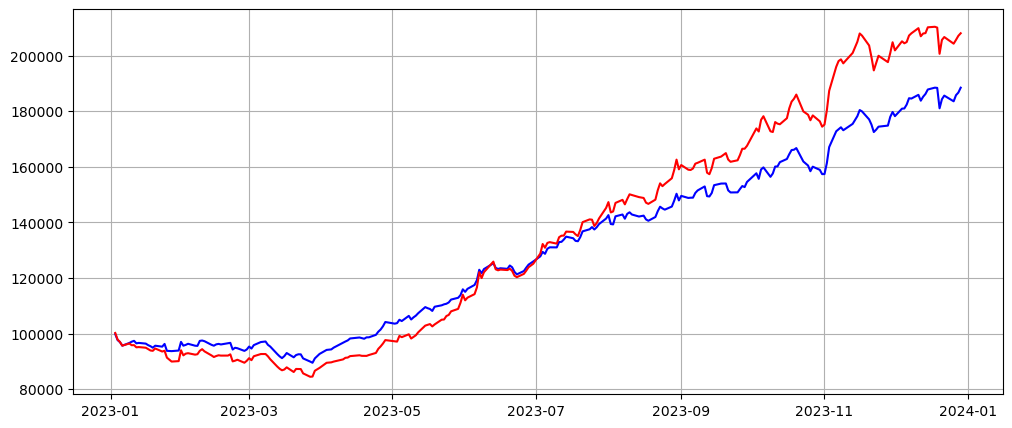

In [317]:
plt.figure(figsize=(12,5))
plt.grid()
plt.plot(df1.index, df1['portfolio_val'], color = 'blue');
plt.plot(df2.index, df2['portfolio_val'], color = 'red');

BLUE--- The first portfolio contains 60% shares in more stable and trusted stocks - ICICI, Tata Motors and Tata Power. the rest 40% is distributed in relatively riskier stocks - Zomato, Suzlon, UjjivanSFB - 2:1\:1

RED--- The second portfolio has 40% in the "stable" stocks - ICICI, Tata Motors n Power. The rest 60% is in the riskier stocks equally distributed - Zomato, Suzlon, UjjivanSFB.

`The red (riskier) portfolio yeilds greater returns (>200k portfolio value) and ~108% CAGR 🥶(Warren Buffet who? 🗿)`

`The Blue (safer) portfolio gave a decent '😶‍🌫️' 88% CAGR`

Text(0.5, 1.0, 'Capital Allocation')

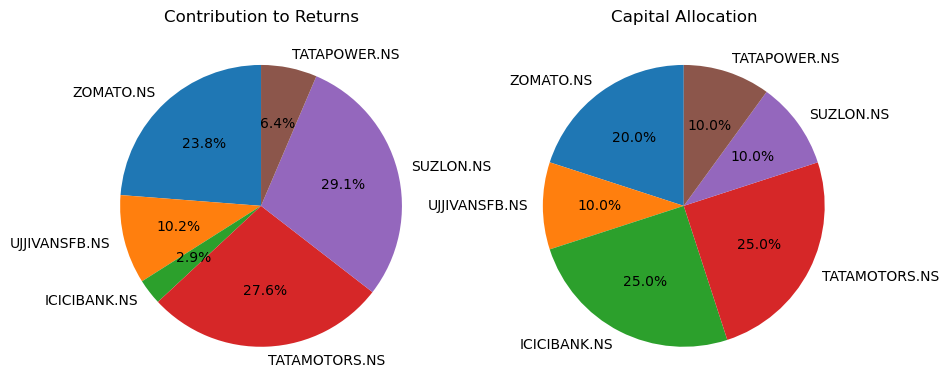

In [323]:
# calculating each stocks' contribution in the net profits
# for calculations im taking the blue portfolio
df1['pnl'] = df1['portfolio_val'] - init_investment


# profits due to each of the stock individually:
for i in range(len(weights1)):
    df1[f'pnl_{tickers[i]}'] = weights1[i]*init_investment*((1+df1[f'daily_return_{tickers[i]}']).cumprod() - 1)


# contribution of each stock in the final profit:
arr = [0] * len(weights1)
arr2 = [0] * len(weights1)
for i in range(len(weights1)):
    arr[i] += df1[f'pnl_{tickers[i]}'].iloc[-1]
arr = np.array(arr)
for i in range(len(weights1)):
    arr2[i] = arr[i] * 100 / arr.sum()
# creating a dict 
dict = {}
for i in range(len(weights1)):
    dict[tickers[i]] = arr2[i]
for i in range(len(weights1)):
    if dict[tickers[i]]<0:
        dict[tickers[i]]=0
plt.figure(figsize=(10,10))


#Returns Contribution
plt.subplot(1,2,1)
plt.pie(dict.values(), labels=dict.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Contribution to Returns")

#Capital Allocation
plt.subplot(1,2,2)
plt.pie(weights1, labels=tickers, autopct='%1.1f%%', startangle=90);
plt.title('Capital Allocation')

Text(0.5, 1.0, 'Capital Allocation')

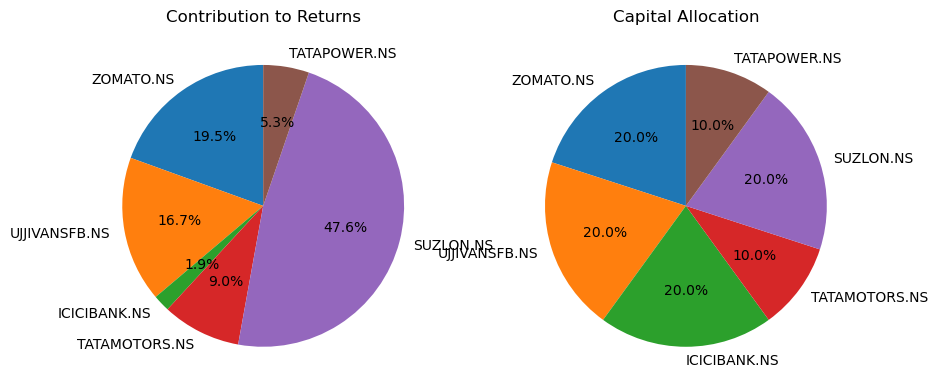

In [325]:
# calculating each stocks' contribution in the net profits
# for calculations im taking the blue portfolio
df2['pnl'] = df2['portfolio_val'] - init_investment


# profits due to each of the stock individually:
for i in range(len(weights2)):
    df2[f'pnl_{tickers[i]}'] = weights2[i]*init_investment*((1+df2[f'daily_return_{tickers[i]}']).cumprod() - 1)


# contribution of each stock in the final profit:
arr = [0] * len(weights2)
arr2 = [0] * len(weights2)
for i in range(len(weights2)):
    arr[i] += df2[f'pnl_{tickers[i]}'].iloc[-1]
arr = np.array(arr)
for i in range(len(weights2)):
    arr2[i] = arr[i] * 100 / arr.sum()
# creating a dict to feed it to the pie chart
dict = {}
for i in range(len(weights2)):
    dict[tickers[i]] = arr2[i]
for i in range(len(weights1)):
    if dict[tickers[i]]<0:
        dict[tickers[i]]=0
plt.figure(figsize=(10,10))


#Returns Contribution
plt.subplot(1,2,1)
plt.pie(dict.values(), labels=dict.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Contribution to Returns")

#Capital Allocation
plt.subplot(1,2,2)
plt.pie(weights2, labels=tickers, autopct='%1.1f%%', startangle=90);
plt.title('Capital Allocation')